In [67]:
# Libraries
import os
import mne
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# from collections import defaultdict

## To save the figures that are not MNEQtBrowser

In [43]:
# Define a function to save all the Figures that are NOT MNEQtBrowser
def save_figure(fig, filename, folder="C:\\Users\\indira.lavocat\\MOVIDOC\\tictrack_eeg_analysis\\Figures"):
    if not os.path.exists(folder):
        os.makedirs(folder)
    fig_path = os.path.join(folder, filename)
    fig.savefig(fig_path)
    print(f"Figure saved: {fig_path}")

# 1. Define the path to the .vhdr file

In [44]:
# 1. Define the path to the .vhdr file
FolderPath = "C:\\Users\\indira.lavocat\\MOVIDOC\\EEG\\Sujets\\IndiraLAVOCAT" # need to adapt the last folder to suit the subject

# Looking for the .vhdr file in the folder
for file in os.listdir(FolderPath):
    if file.endswith(".vhdr"):
        FilePath = os.path.join(FolderPath, file)
        break

print(FilePath)


# vhdr_file = "C:\\Users\\indira.lavocat\\MOVIDOC\\EEG\\Indira Test\\MOVIDOCTicTrack000005.vhdr"

C:\Users\indira.lavocat\MOVIDOC\EEG\Sujets\IndiraLAVOCAT\MOVIDOCTicTrack000005.vhdr


# 2. Load the data

In [45]:
raw = mne.io.read_raw_brainvision(FilePath, preload=True)

Extracting parameters from C:\Users\indira.lavocat\MOVIDOC\EEG\Sujets\IndiraLAVOCAT\MOVIDOCTicTrack000005.vhdr...
Setting channel info structure...
Reading 0 ... 79759  =      0.000 ...   159.518 secs...


C:\Users\indira.lavocat\AppData\Local\Temp\ipykernel_18988\2402428994.py:1: RuntimeWarning: Online software filter detected. Using software filter settings and ignoring hardware values
  raw = mne.io.read_raw_brainvision(FilePath, preload=True)


In [46]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, F3, F7, FT9, FC5, FC1, C3, T7, TP9, CP5, CP1, Pz, P3, P7, ...
 chs: 31 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2025-05-13 16:30:12 UTC
 nchan: 31
 projs: []
 sfreq: 500.0 Hz
>

In [47]:
print(raw.ch_names)

['Fp1', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2']


In [48]:
print(raw.info['description']) # gives a note about the channels when there is one

None


# 3. Define the montage

In [49]:
raw.set_montage("standard_1020") # to adapt according to the montage used during the exepriments

<RawBrainVision | MOVIDOCTicTrack000005.eeg, 31 x 79760 (159.5 s), ~18.9 MiB, data loaded>

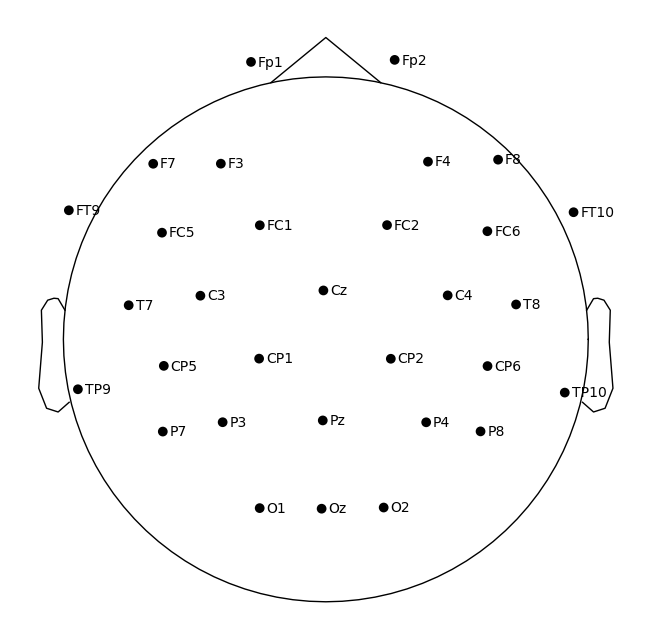

Figure saved: C:\Users\indira.lavocat\MOVIDOC\tictrack_eeg_analysis\Figures\Figure1_SensorsMontage.png


In [50]:
Sensors_Montage_Figure_1 = raw.plot_sensors(show_names=True)
save_figure(Sensors_Montage_Figure_1, "Figure1_SensorsMontage.png")
# fig.savefig("C:\\Users\\indira.lavocat\\MOVIDOC\\tictrack_eeg_analysis\\Figures\\Figure1_SensorsMontage.png")

# 4. Extract the stimulus

In [51]:
# Create an events dicionnary
events, event_id = mne.events_from_annotations(raw)
print("Events list (stimulus) :")
print(event_id)

Used Annotations descriptions: [np.str_('New Segment/'), np.str_('Stimulus/S  1'), np.str_('Stimulus/S  2'), np.str_('Stimulus/S  3'), np.str_('Stimulus/S  4'), np.str_('Stimulus/S  5'), np.str_('Stimulus/S  6'), np.str_('Stimulus/S  7'), np.str_('Stimulus/S  8'), np.str_('Stimulus/S  9'), np.str_('Stimulus/S 10'), np.str_('Stimulus/S 11'), np.str_('Stimulus/S 12'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 21'), np.str_('Stimulus/S 22'), np.str_('Stimulus/S 23'), np.str_('Stimulus/S 24'), np.str_('Stimulus/S 25')]
Events list (stimulus) :
{np.str_('New Segment/'): 99999, np.str_('Stimulus/S  1'): 1, np.str_('Stimulus/S  2'): 2, np.str_('Stimulus/S  3'): 3, np.str_('Stimulus/S  4'): 4, np.str_('Stimulus/S  5'): 5, np.str_('Stimulus/S  6'): 6, np.str_('Stimulus/S  7'): 7, np.str_('Stimulus/S  8'): 8, np.str_('Stimulus/S  9'): 9, np.str_('Stimulus/S 10'): 10, np.str_('Stimulus/S 11'): 11, np.str_('Stimulus/S 12'): 12, np.str_('Stimulus/S 13'): 13, np.str_('S

In [52]:
# Display the tab of events
print("Events (sample, previous_id, event_id) :")
print(events)

Events (sample, previous_id, event_id) :
[[    0     0 99999]
 [ 2971     0     1]
 [ 6388     0    25]
 [ 6393     0     2]
 [10935     0    25]
 [10940     0     3]
 [12636     0    21]
 [13521     0    21]
 [14309     0    21]
 [15058     0    21]
 [15773     0    21]
 [15777     0     4]
 [19459     0    25]
 [19464     0     5]
 [24943     0     6]
 [28263     0    25]
 [28267     0     7]
 [33753     0     8]
 [36571     0    25]
 [36575     0     9]
 [38181     0    21]
 [38568     0    22]
 [40526     0    21]
 [41150     0    22]
 [42979     0    21]
 [43429     0    22]
 [44578     0    21]
 [45201     0    22]
 [46138     0    21]
 [46350     0    22]
 [47052     0    10]
 [51114     0    25]
 [51119     0    11]
 [51765     0    21]
 [52266     0    22]
 [54178     0    21]
 [54709     0    22]
 [55872     0    21]
 [56340     0    22]
 [57552     0    21]
 [58051     0    22]
 [59551     0    24]
 [60448     0    24]
 [61248     0    21]
 [61731     0    22]
 [61776     0 

In [53]:
# Convert the timestamps into seconds
events_no_zero = events[events[:, 0] != 0]  # <-- filters the events at 0.000 s
events_times_sec = events_no_zero[:, 0] / raw.info['sfreq'] # converts the timestamps into seconds

for time, eid in zip(events_times_sec, events_no_zero[:, 2]): # links each time in seconds to its event ID
    print(f"Stimulus {eid} à {time:.3f} s") # formats the number with 3 decimal

Stimulus 1 à 5.942 s
Stimulus 25 à 12.776 s
Stimulus 2 à 12.786 s
Stimulus 25 à 21.870 s
Stimulus 3 à 21.880 s
Stimulus 21 à 25.272 s
Stimulus 21 à 27.042 s
Stimulus 21 à 28.618 s
Stimulus 21 à 30.116 s
Stimulus 21 à 31.546 s
Stimulus 4 à 31.554 s
Stimulus 25 à 38.918 s
Stimulus 5 à 38.928 s
Stimulus 6 à 49.886 s
Stimulus 25 à 56.526 s
Stimulus 7 à 56.534 s
Stimulus 8 à 67.506 s
Stimulus 25 à 73.142 s
Stimulus 9 à 73.150 s
Stimulus 21 à 76.362 s
Stimulus 22 à 77.136 s
Stimulus 21 à 81.052 s
Stimulus 22 à 82.300 s
Stimulus 21 à 85.958 s
Stimulus 22 à 86.858 s
Stimulus 21 à 89.156 s
Stimulus 22 à 90.402 s
Stimulus 21 à 92.276 s
Stimulus 22 à 92.700 s
Stimulus 10 à 94.104 s
Stimulus 25 à 102.228 s
Stimulus 11 à 102.238 s
Stimulus 21 à 103.530 s
Stimulus 22 à 104.532 s
Stimulus 21 à 108.356 s
Stimulus 22 à 109.418 s
Stimulus 21 à 111.744 s
Stimulus 22 à 112.680 s
Stimulus 21 à 115.104 s
Stimulus 22 à 116.102 s
Stimulus 24 à 119.102 s
Stimulus 24 à 120.896 s
Stimulus 21 à 122.496 s
Stimulus

Alternative to display the stimulus name (and not its ID) with its timestamp in seconds

In [54]:
id_to_name = {v: k for k, v in event_id.items()}

for time, eid in zip(events_times_sec, events_no_zero[:, 2]):
    name = id_to_name.get(eid, f"ID {eid}")
    print(f"{name} à {time:.3f} s")

Stimulus/S  1 à 5.942 s
Stimulus/S 25 à 12.776 s
Stimulus/S  2 à 12.786 s
Stimulus/S 25 à 21.870 s
Stimulus/S  3 à 21.880 s
Stimulus/S 21 à 25.272 s
Stimulus/S 21 à 27.042 s
Stimulus/S 21 à 28.618 s
Stimulus/S 21 à 30.116 s
Stimulus/S 21 à 31.546 s
Stimulus/S  4 à 31.554 s
Stimulus/S 25 à 38.918 s
Stimulus/S  5 à 38.928 s
Stimulus/S  6 à 49.886 s
Stimulus/S 25 à 56.526 s
Stimulus/S  7 à 56.534 s
Stimulus/S  8 à 67.506 s
Stimulus/S 25 à 73.142 s
Stimulus/S  9 à 73.150 s
Stimulus/S 21 à 76.362 s
Stimulus/S 22 à 77.136 s
Stimulus/S 21 à 81.052 s
Stimulus/S 22 à 82.300 s
Stimulus/S 21 à 85.958 s
Stimulus/S 22 à 86.858 s
Stimulus/S 21 à 89.156 s
Stimulus/S 22 à 90.402 s
Stimulus/S 21 à 92.276 s
Stimulus/S 22 à 92.700 s
Stimulus/S 10 à 94.104 s
Stimulus/S 25 à 102.228 s
Stimulus/S 11 à 102.238 s
Stimulus/S 21 à 103.530 s
Stimulus/S 22 à 104.532 s
Stimulus/S 21 à 108.356 s
Stimulus/S 22 à 109.418 s
Stimulus/S 21 à 111.744 s
Stimulus/S 22 à 112.680 s
Stimulus/S 21 à 115.104 s
Stimulus/S 22 à 1

### NOT TO DO : Alternative whith a pandas DataFrame output

In [ ]:
id_to_name = {v: k for k, v in event_id.items()}

events_data = [] # création of dictionnaries list (one per event)
for time, eid in zip(events_times_sec, events[:, 2]):
    name = id_to_name.get(eid, f"ID {eid}")
    events_data.append({
        "Nom de l'événement": name,
        "ID": eid,
        "Temps (s)": round(time, 3)
    })

df_events = pd.DataFrame(events_data) # conversion into a DataFrame

print(df_events)

# 5. Quick plot of the data

In [55]:
Original_Signal_Figure_2 = raw.plot(title = "Orginal Signal")

# 6. Filter the data

## Highpass

In [56]:
# Define the high and low frequencies
HFreq = 30
LFreq = 1
raw_HighLowPassed = raw.filter(l_freq = LFreq, h_freq = HFreq)

# for ERPs, [1-30] Hz band-pass filter

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1651 samples (3.302 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    0.0s finished


In [57]:
# Plot the highpassed signal
Signal_HighLowPassed_Figure_3 = raw_HighLowPassed.plot(title = "High- and Low- passed Signal")

## Notch

In [58]:
# Define the parameters for the notch filter
if HFreq < 50:
    raw_Notched = raw_HighLowPassed
else:
    raw_Notched = raw_HighLowPassed.notch_filter(freqs = [50], picks = "data", method = "spectrum_fit")

In [59]:
# Plot the notched signal
Signal_Notched_Figure_4 = raw_Notched.plot(title = "Notched Signal")

Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none
Channels marked as bad:
none


# 7. Reset the file time

In [60]:
if events_times_sec[0] == 0 and len(events_times_sec) > 1: # check if the 1st stimulus is at 0 s. If so, use the 2nd stimulus
    first_stimulus_time = events_times_sec[1]
    print(f"First stimulus is at 0. Using second stimulus at {first_stimulus_time:.3f} s")
else:
    first_stimulus_time = events_times_sec[0]
    print(f"First stimulus at {first_stimulus_time:.3f} s")

# Get the time of the 1st stimulus (in seconds)
# first_stimulus_time = events_times_sec[0]
# print(f"First stimulus at {first_stimulus_time:.3f} s")

First stimulus at 5.942 s


In [61]:
# Truncate the signal to start at this point
raw_cropped = raw_Notched.copy().crop(tmin=first_stimulus_time)

In [62]:
# Reset the annotations by shifting all annotations by - first_stimulus_time
if raw.annotations is not None:
    raw_annotation_times = raw.annotations.onset - first_stimulus_time
    raw_cropped.set_annotations(
        mne.Annotations(
            onset=raw_annotation_times, # onset = raw_annotation_times with the new reset times
            duration=raw.annotations.duration,
            description=raw.annotations.description
        )
    )

C:\Users\indira.lavocat\AppData\Local\Temp\ipykernel_18988\2637390326.py:4: RuntimeWarning: Omitted 1 annotation(s) that were outside data range.
  raw_cropped.set_annotations(


In [63]:
# Plot truncated and recalculated data
Readjusted_Signal_Figure_5 = raw_cropped.plot(title="Readjusted signal (from the 1st stimulus not at 0 s)")

# 8. Crop the signal according to tasks

## 8.1. Crop the signal to get baselines

### NOT TO DO : until transition between the P2a phase and the P3 phase

In [ ]:
# Define the parameters
target_stimulus_name = "Stimulus/S  8"  # sent during the transition between the 1d task and the 2a phase
target_occurrence = 1          # number of the chosen occurrence

# Search of the stimulus occurrence times in raw_cropped.annotations
matching_onsets = [
    onset for onset, desc in zip(raw_cropped.annotations.onset, raw_cropped.annotations.description)
    if desc == target_stimulus_name
]

# Check if the occurrence exists
if len(matching_onsets) >= target_occurrence:
    crop_end_time = matching_onsets[target_occurrence - 1] # get the time of the chosen occurrence
    raw_final = raw_cropped.copy().crop(tmin=0, tmax=crop_end_time) # new signal cut until the chosen stimulus
    print(f"✅ Signal cropped from 0.000 s to {crop_end_time:.3f} s (stimulus: {target_stimulus_name}, occurrence {target_occurrence})")
else:
    print(f"❌ Only {len(matching_onsets)} occurrence(s) found for the stimulus '{target_stimulus_name}'. Signal not modified.")
    raw_final = raw_cropped.copy()

### NOT TO DO : Only the P1 phase (press a key)

In [ ]:
# Define the parameters
begin_P1_stimulus_name = "Stimulus/S  3" # sent at the beginning of the P1 task
begin_P1_occurrence = 1 # number of the chosen occurrence
end_P1_stimulus_name = "Stimulus/S  4" # sent at the ending of the P1 task 
end_P1_occurrence = 1 # number of the chosen occurrence

# Search for the stimulus occurrence times in raw_cropped.annotations
start_times = [
    onset for onset, desc in zip(raw_cropped.annotations.onset, raw_cropped.annotations.description)
    if desc == begin_P1_stimulus_name
]
end_times = [
    onset for onset, desc in zip(raw_cropped.annotations.onset, raw_cropped.annotations.description)
    if desc == end_P1_stimulus_name
]

# Check if the specified occurrences exist
if len(start_times) >= begin_P1_occurrence and len(end_times) >= end_P1_occurrence:
    crop_start_time = start_times[begin_P1_occurrence - 1] # get the time of the beginning of the P1 task
    crop_end_time = end_times[end_P1_occurrence - 1] # get the time of the end of the P1 task
    if crop_start_time < crop_end_time: # check if the chosen beginning is indeed before the chosen end
        raw_P1 = raw_cropped.copy().crop(tmin=crop_start_time, tmax=crop_end_time) # cut the signal between beginning and end
        print(f"✅ Signal cropped from {crop_start_time:.3f} s to {crop_end_time:.3f} s "
              f"(from stimulus: {begin_P1_stimulus_name}, occurrence {begin_P1_occurrence} "
              f"to stimulus: {end_P1_stimulus_name}, occurrence {end_P1_occurrence})")
    else:
        print(f"❌ Start time ({crop_start_time:.3f}) is after end time ({crop_end_time:.3f}). Check the order of stimuli.")
        raw_P1 = raw_cropped.copy()
else:
    print(f"❌ Not enough occurrences found: "
          f"{len(start_times)} for '{begin_P1_stimulus_name}', {len(end_times)} for '{end_P1_stimulus_name}'. Signal not modified.")
    raw_P1 = raw_cropped.copy()

In [ ]:
# Plot the new signal (cropped until the chosen timestamp)
Signal_P1_Phase_Figure_6 = raw_P1.plot(title="Signal of Phase 1")

### 8.1.a. Get the "press a key" baseline from the P1 phase

In [ ]:
# Define the parameters
begin_P1_stimulus = "Stimulus/S  3" # sent at the beginning of the P1 task
end_P1_stimulus = "Stimulus/S  4" # sent at the ending of the P1 task 

# Create a list with annotations and their times
list_annotations = list(zip(raw_cropped.annotations.onset, raw_cropped.annotations.description))

# Find all the segments in the P1 phase
P1_segments = []
i = 0
while i < len(list_annotations):
    onset, desc = list_annotations[i]
    if desc == begin_P1_stimulus:
        # Chercher le prochain événement de fin
        for j in range(i + 1, len(list_annotations)):
            next_onset, next_desc = list_annotations[j]
            if next_desc == end_P1_stimulus:
                P1_segments.append((onset, next_onset))
                i = j  # reprendre après le stop
                break
    i += 1

# Get all the stimuli present in the segments
stimuli_in_P1 = []
for start, end in P1_segments:
    for onset, desc in list_annotations:
        if start <= onset <= end:
            # On ignore les marqueurs de début et de fin eux-mêmes
            if desc not in (begin_P1_stimulus, end_P1_stimulus):
                stimuli_in_P1.append((onset, desc))

# Display & check the stimuli found
print(f"{len(stimuli_in_P1)} stimuli trouvés entre '{begin_P1_stimulus}' et '{end_P1_stimulus}' :")
for onset, desc in stimuli_in_P1:
    print(f"{desc} à {onset:.3f} s")

5 stimuli trouvés entre 'Stimulus/S  3' et 'Stimulus/S  4' :
Stimulus/S 21 à 25.272 s
Stimulus/S 21 à 27.042 s
Stimulus/S 21 à 28.618 s
Stimulus/S 21 à 30.116 s
Stimulus/S 21 à 31.546 s


#### To get the mean of the signal values -2 seconds before & +2 seconds after each stimulus

In [71]:
# Define the window around each stimulus
tmin = -2.0 # 2 secondes before
tmax = 2.0 # 2 secondes after

# Get the sampling frequency
sfreq = raw_cropped.info['sfreq']

# Initiate a list to stock the extracted values (expected shape per segment : n_channels x n_times)
signal_segments = []

for onset, desc in stimuli_in_P1:
    start = onset + tmin
    end = onset + tmax
    # Check if the window is not outside the signal bounds
    if start < 0 or end > raw_cropped.times[-1]:
        print(f"⚠️ Stimulus at {onset:.2f}s ignored (window [{start:.2f}, {end:.2f}] out of limits)")
        continue
    # Get the segment
    segment = raw_cropped.copy().crop(tmin=start, tmax=end).get_data() # shape: (n_channels, n_times)
    signal_segments.append(segment)

# Convert into an array numpy : shape = (n_events, n_channels, n_times)
P1_segments_array = np.array(signal_segments)

# Calculer la moyenne sur tous les événements : shape = (n_channels, n_times)
mean_segment = np.mean(P1_segments_array, axis=0)

# Afficher la forme du résultat
print(f"\n✅ {len(signal_segments)} valide segments used.")
print(f"Shape of the mean segment : {mean_segment.shape} (n_channels, n_times)")


✅ 5 valide segments used.
Shape of the mean segment : (31, 2001) (n_channels, n_times)


Display the mean segment

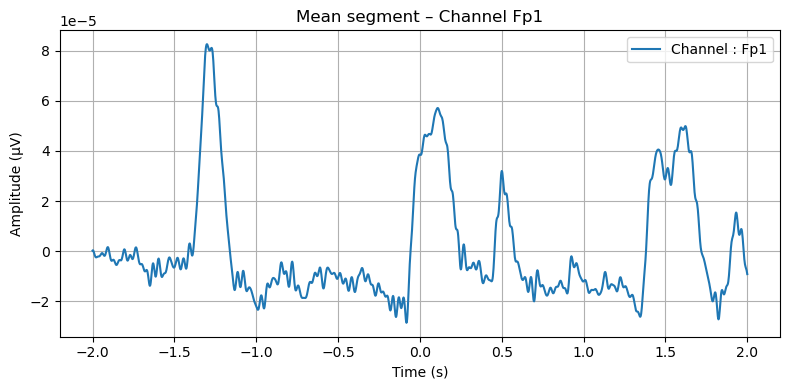

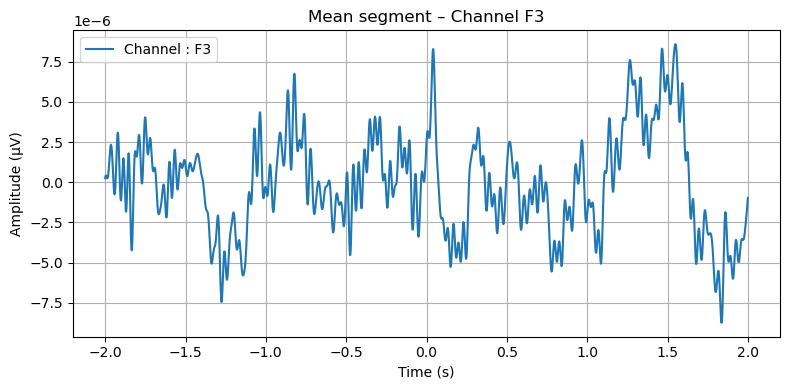

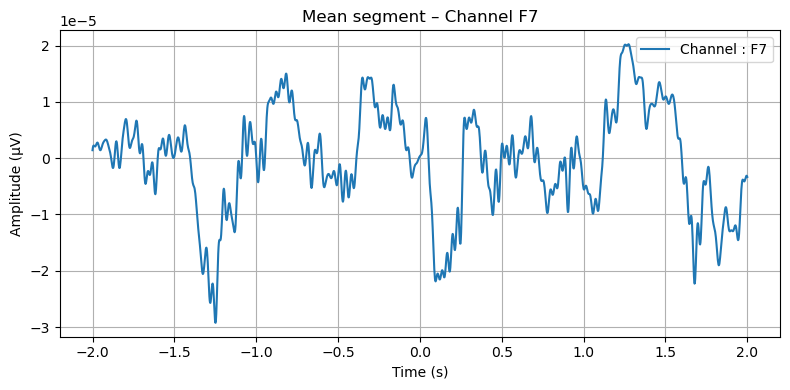

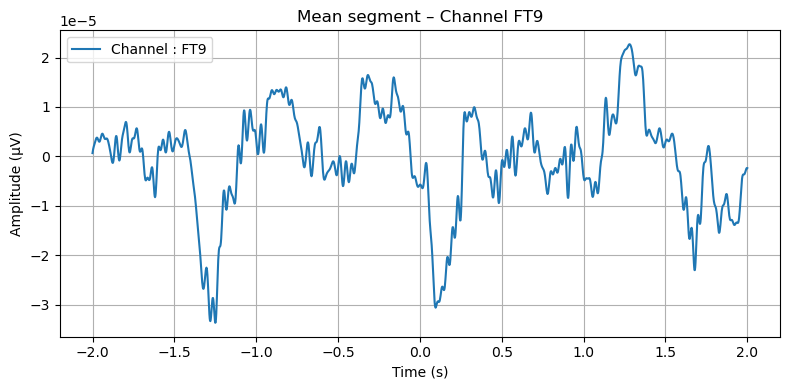

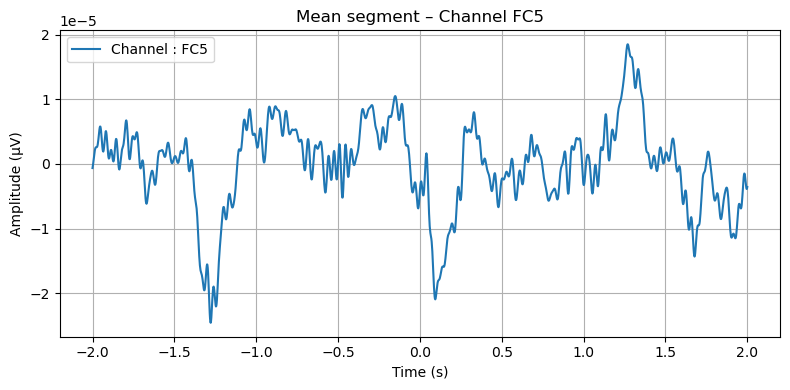

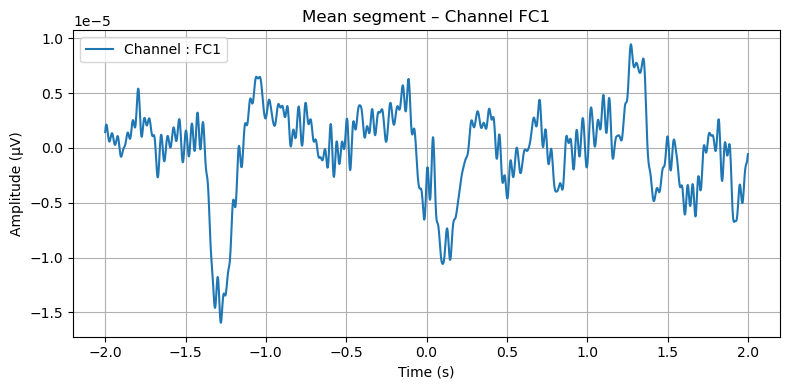

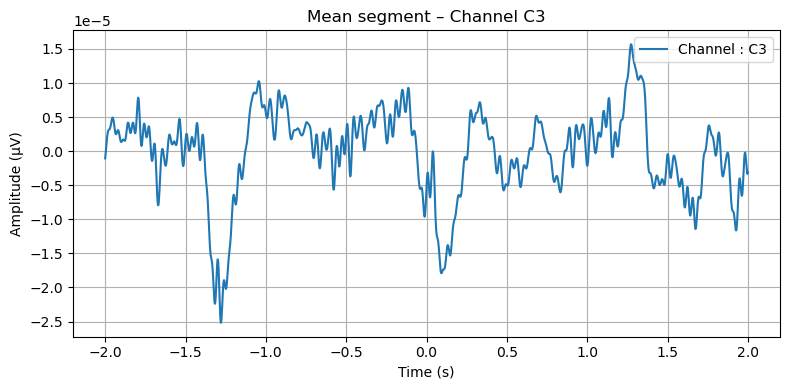

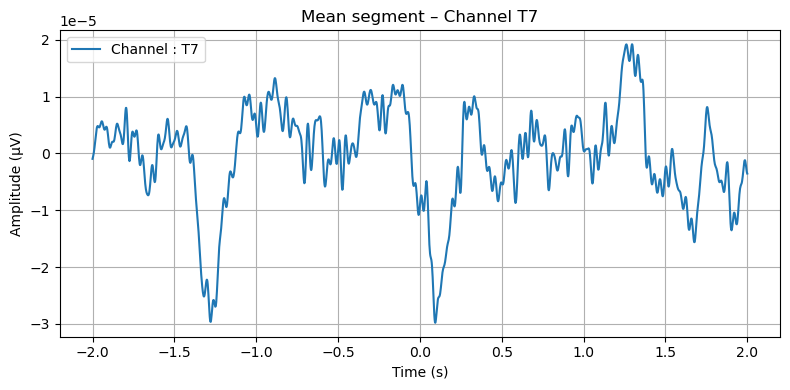

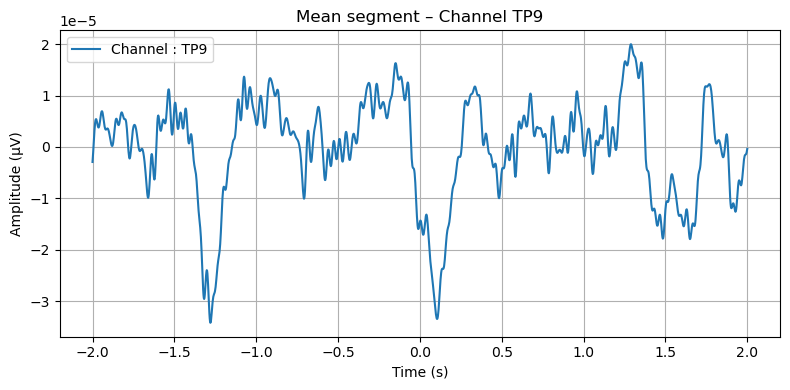

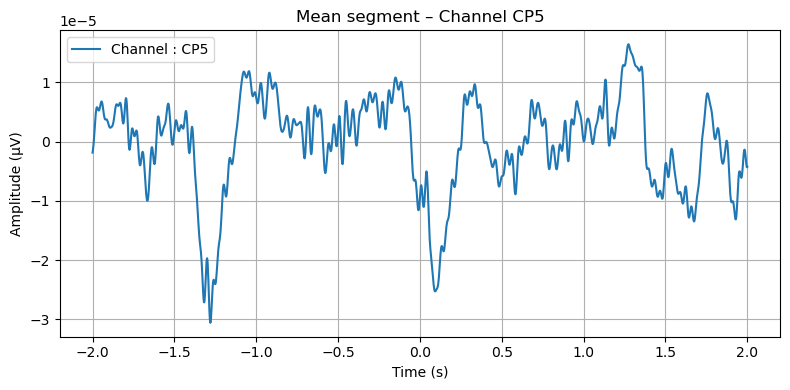

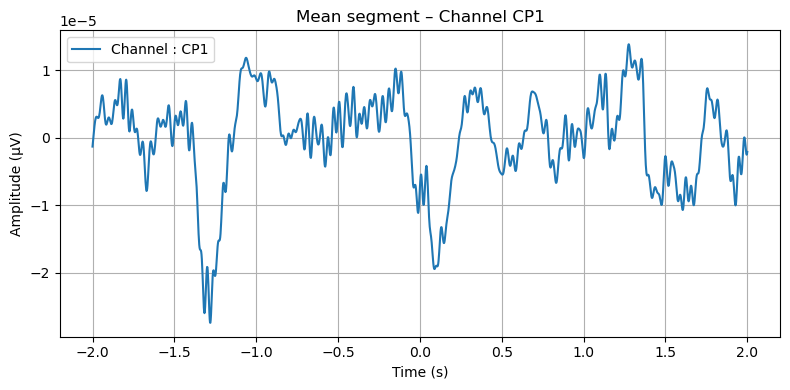

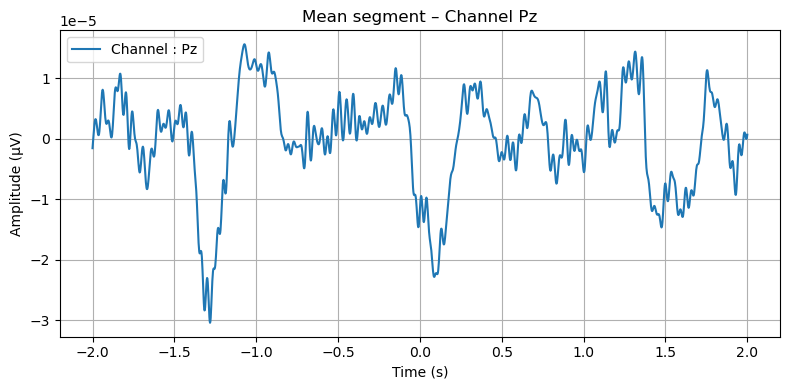

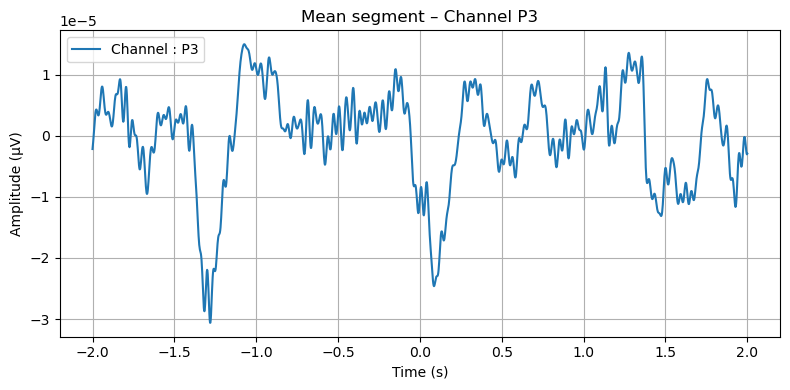

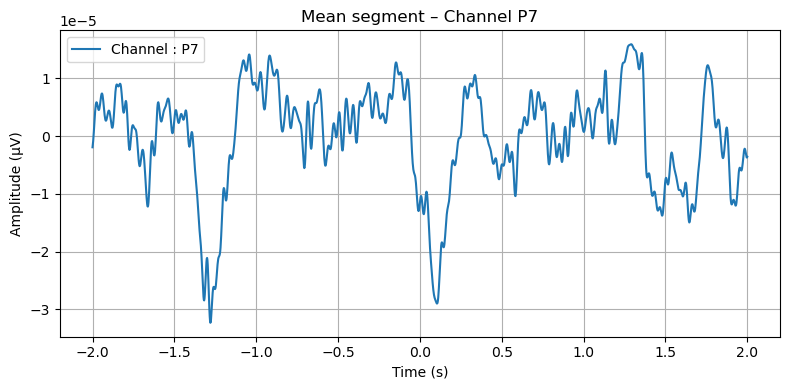

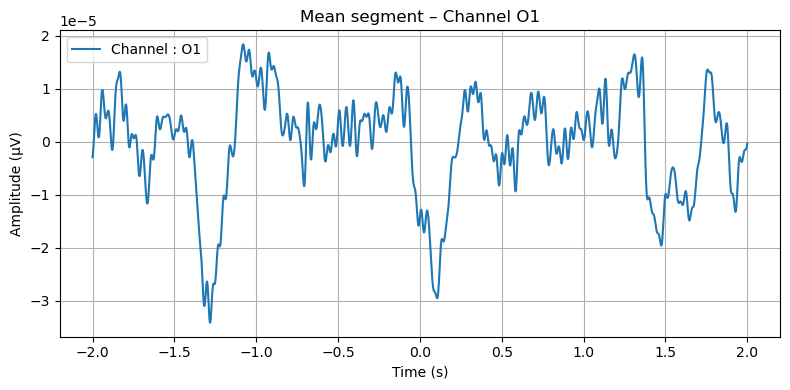

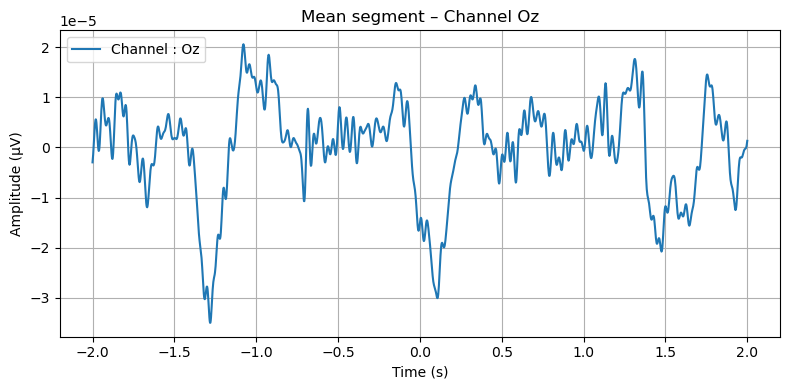

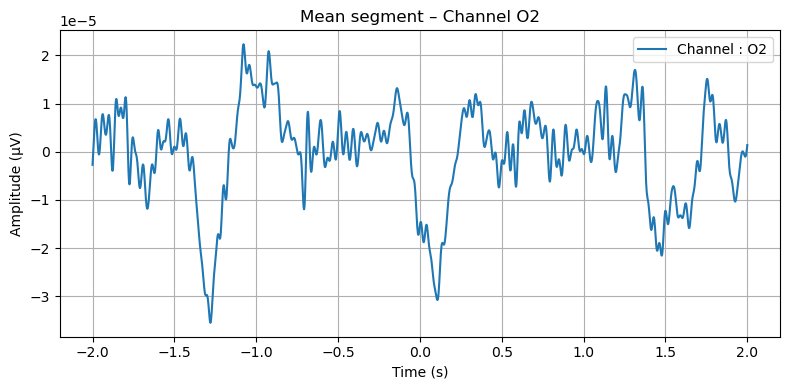

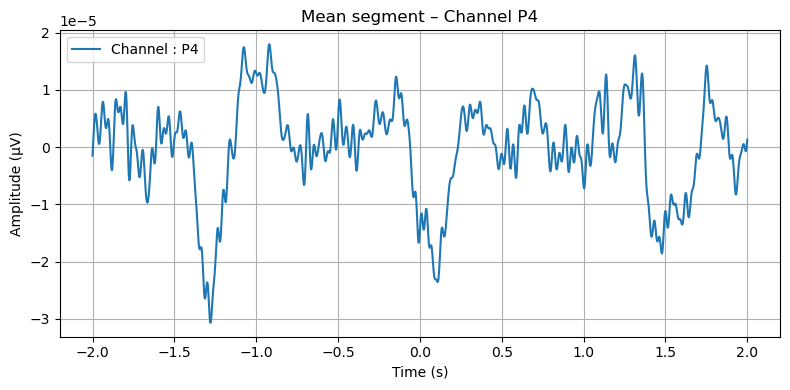

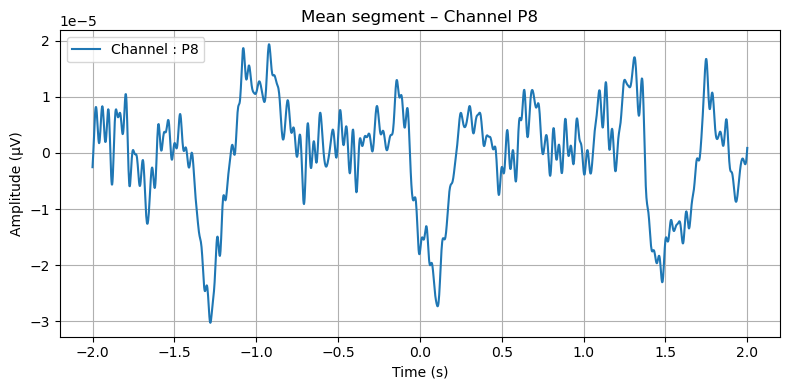

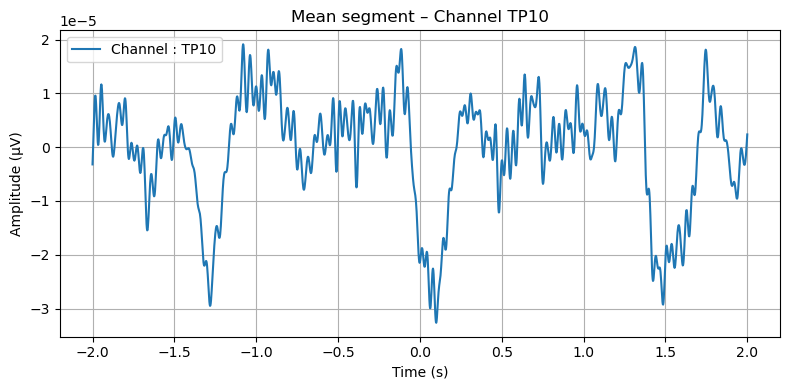

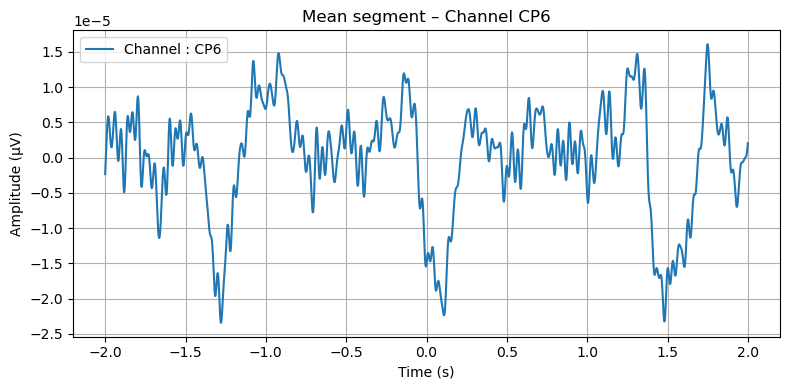

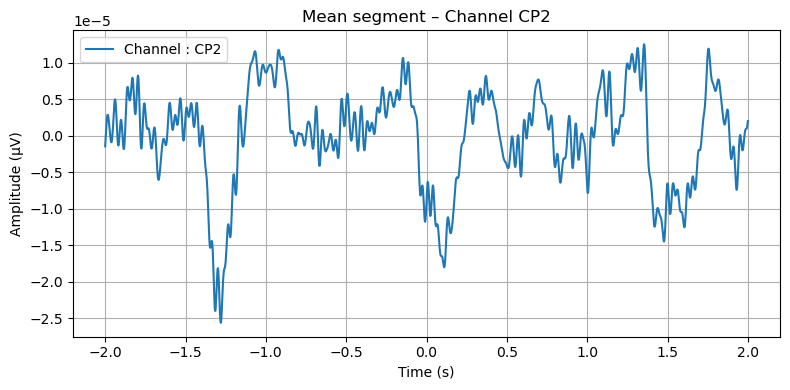

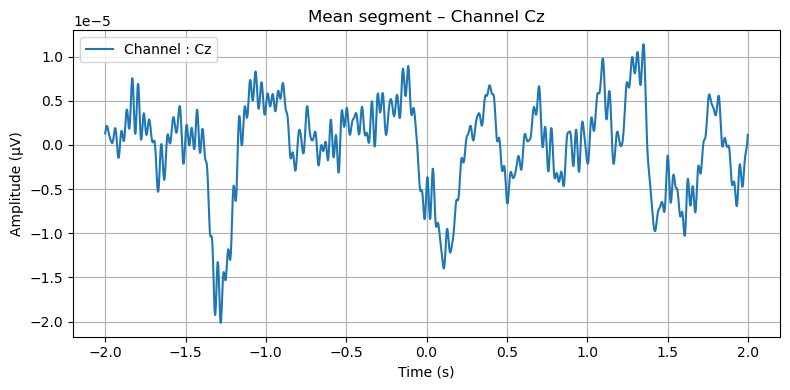

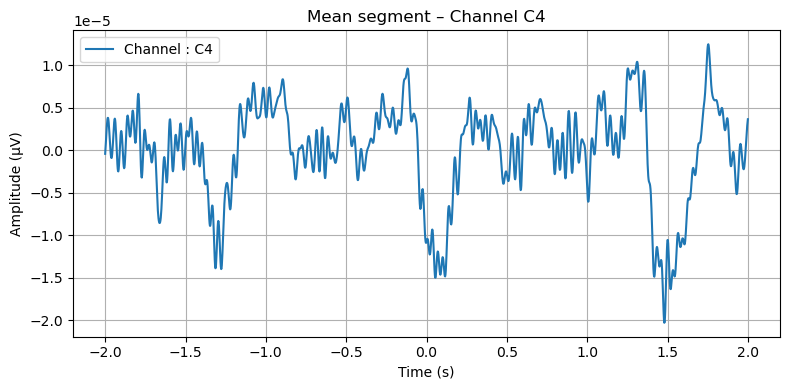

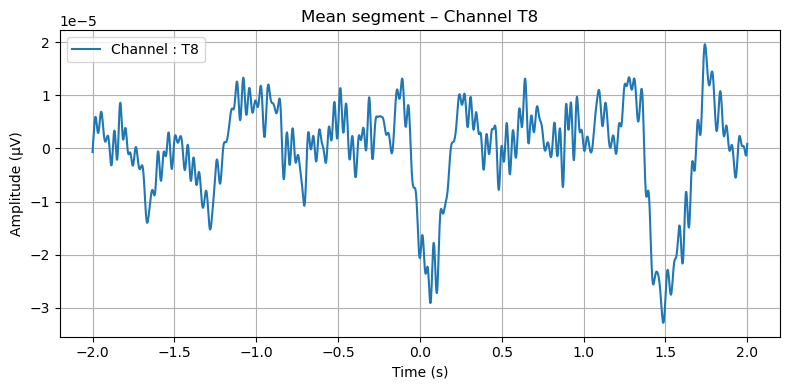

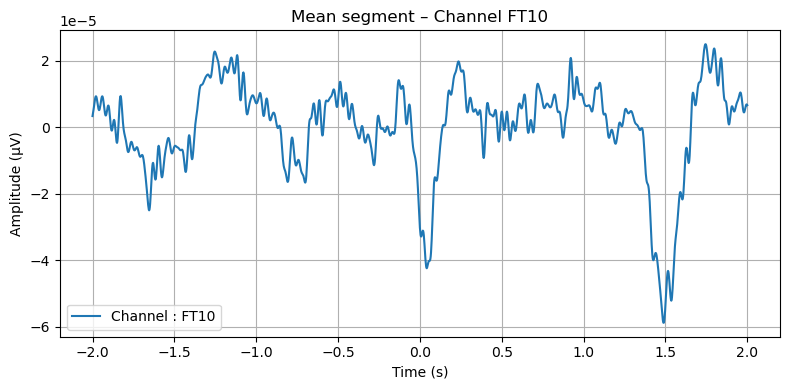

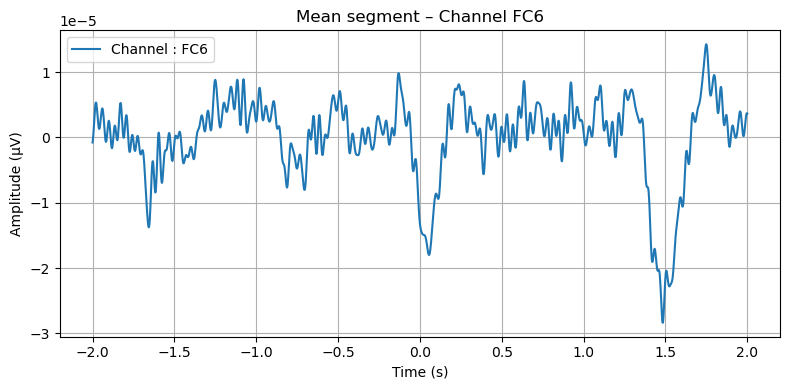

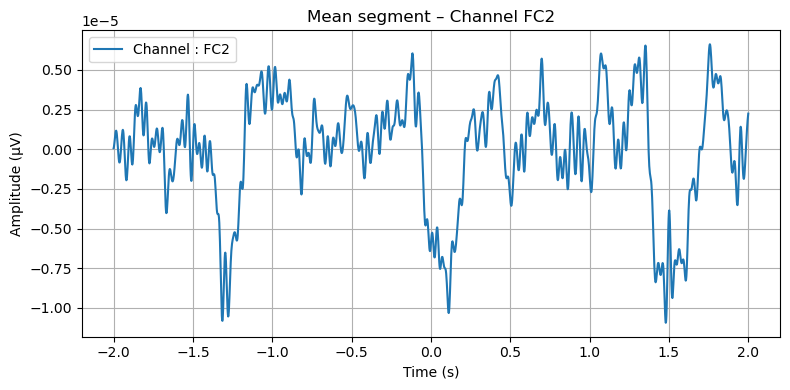

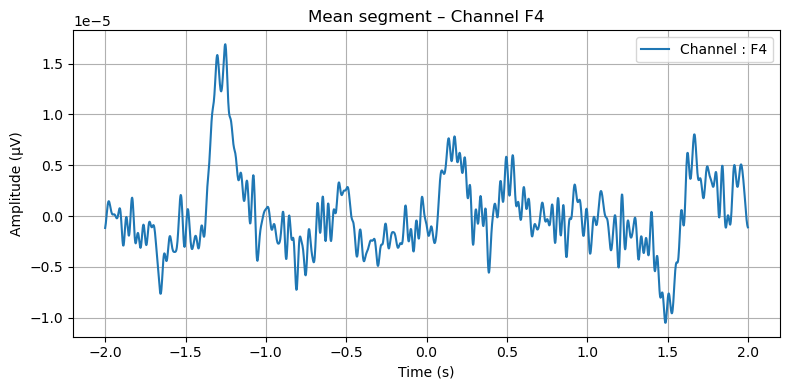

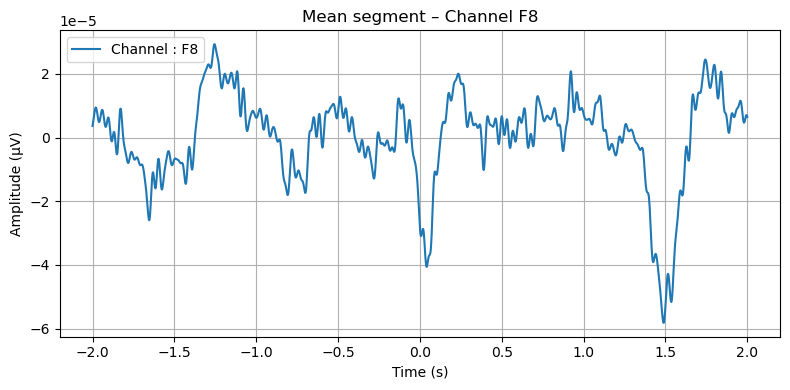

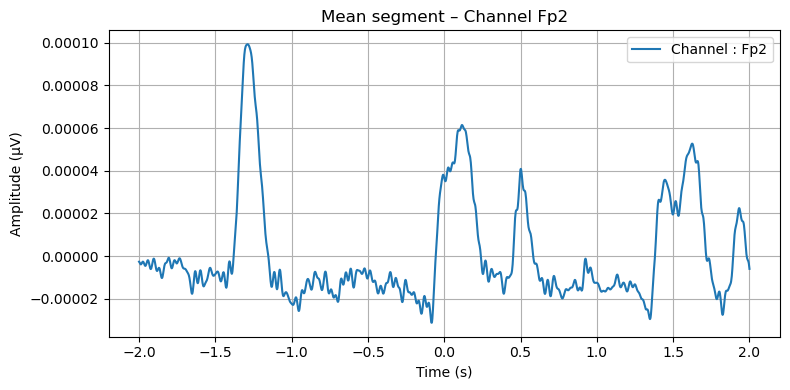

In [72]:
# Create the temporal axe for the mean segment
n_times = mean_segment.shape[1]
times = np.linspace(tmin, tmax, n_times)

# Trace each channel in a seperated figure
for ch_idx, ch_name in enumerate(raw_cropped.ch_names):
    signal = mean_segment[ch_idx, :]
    
    plt.figure(figsize=(8, 4))
    plt.plot(times, signal, label=f'Channel : {ch_name}')
    plt.title(f"Mean segment – Channel {ch_name}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (µV)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

#### NO TO DO : To get the mean of the signal values at the exact time of each stimulus

In [ ]:
# Initiate a list to stock the extracted values
signal_values_at_stimulus = []

# Get the signal value for each stimulus
for onset, desc in stimuli_in_P1:
    sample_index = int(onset * raw_cropped.info['sfreq'])  # convertir le temps en index d'échantillon
    signal_sample = raw_cropped[:, sample_index][0]  # shape = (n_channels,)
    signal_values_at_stimulus.append(signal_sample)

# Convert into an array (shape: n_events x n_channels)
signal_values_array = np.array(signal_values_at_stimulus)  # shape = (n_events, n_channels)

# Mean of all the events (shape: n_channels,)
mean_signal_per_channel = np.mean(signal_values_array, axis=0)

# Display the mean signal from the stimuli in P1 phase
print("Mean value of the signal from the stimuli in P1 phase (per channel) :")
for ch_name, value in zip(raw_cropped.ch_names, mean_signal_per_channel):
    print(f"{ch_name}: {value:.3f} µV")

OPTIONNAL : Display the mean of the signal for one particular channel

In [ ]:
channel_name = "Cz"  # to adapt
if channel_name in raw_cropped.ch_names:
    idx = raw_cropped.ch_names.index(channel_name)
    plt.figure()
    plt.plot(times, mean_segment[idx])
    plt.title(f"Moyenne du signal au canal {channel_name} entre '{begin_P1_stimulus}' et '{end_P1_stimulus}'")
    plt.xlabel("Temps (s)")
    plt.ylabel("Amplitude (µV)")
    save_figure(plt.gcf(), f"Figure_Moyenne_{channel_name}.png")
    plt.show()
else:
    print(f"Canal {channel_name} non trouvé.")

### 8.1.b. Only the P2a phase (eyes closed)

### 8.1.b. Only the P2b phase (eyes open)

# 9. Seperation in epochs

In [ ]:
tmin = -0.2  # 200 ms before the event
tmax = 0.8   # 800 ms after the event
epochs = mne.Epochs(raw, events, event_id=event_id,
                    tmin=tmin, tmax=tmax, baseline=(None, 0),
                    preload=True)
epochs.plot_drop_log()

# 10. Define an automatic reject of the artifacts (optional)

In [ ]:
# epochs.plot_drop_log()
# epochs.drop_bad()

# 11. Averaging (ERP)

In [ ]:
evoked = epochs.average()
# evoked.plot(title="ERP (moyenne des epochs)")
evoked.plot() # evoked does not accept any "title"

# To add a title to the graph
# fig = evoked.plot_image(picks='eeg')
# fig.suptitle("ERP (moyenne des epochs)")


In [ ]:
# To add a title to the graph
fig = evoked.plot_image(picks='eeg')
fig.suptitle("ERP (moyenne des epochs)")

# 12. Topography

In [ ]:
# evoked.plot_topomap(times=[0.1, 0.2, 0.3], ch_type='eeg', title="Topomap à 100/200/300 ms")
evoked.plot_topomap(times=[0.1, 0.2, 0.3], ch_type='eeg')

*** Show the Data ***

In [ ]:
plt.show()